# D213: Advanced Data Analytics, Task 2
Western Governors University
<br>Bailey Psuik 
<br>February 2024

### Part I: Research Question

**A1. Research question**
<br>Customer opinions are critical to the success of a business. Customers review businesses to share their thoughts, both good and bad, and it is up to the business to understand what its customers want. Large multinational businesses have many customer opinions to consider, and therefore need an efficient way to break down and understand these reviews.

Written reviews by customers come in an unstructured format, and thus require processing to be understood by machine learning algorithms. This is where natural language processing (NLP) comes in. “NLP is a branch of data science that consists of systeming processes for analyzing, understanding, and deriving information from the text data in a smart and efficient manner. By utilizing NLP and its components, one can organize the massive chunks of text data, perform numerous automated tasks, and solve a wide range of problems” (Bansal, 2022).

One industry where customer reviews are especially critical is the filmmaking industry. This report will analyze data from IMDb reviews. This dataset contains written reviews by moviegoers along with the sentiment behind their review. Sentiment analysis will be performed through NLP to answer the question: **“Can a future movie reviews be predicted to have a positive or negative sentiment based on past reviews from other moviegoers?**

**A2. Objectives**
<br>The objective of this report is to **build a model that will accurately predict how a viewer feels about a film based on the words they use in their review.** This understanding will provide film studios with a basis for understanding trends in viewer sentiment in order to aid in future decision-making.

**A3. Prescribed network**
There are many different types of neural networks capable of performing text classification tasks to aid in NLP. For purposes of this analysis, a recurrent neural network (RNN) will be constructed and trained to produce meaningful predictions on text sequences in the IMDb dataset. 

RNNs work with sequential data. “Sequential data is data–such as words, sentences, or time-series data– where sequential components interrelate based on complex semantics and syntax rules (AWS, n.d.). Put simply, the order of words in a sentence matters, as the order of words impacts the overall sentiment of a customer review, in this case. Thus, an appropriate choice for the type of neural network used in this analysis is an RNN.

### Part II: Data Preparation

**B1.  Data Exploration**
<br>Exploratory data analysis is performed on the IMDb dataset. An explanation of each of the following elements is included:
* B1a. Presence of unusual characters (e.g., emojis, non-English characters)
* B1b. Vocabulary size
* B1c. Proposed word embedding length
* B1d. Statistical justification for the chosen maximum sequence length

In [2]:
# Import packages 

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical

import re

import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize

from sklearn.model_selection import train_test_split
from sklearn import metrics

In [4]:
# Read the imdb data
imdb = pd.read_csv('C:/Users/psuik/Desktop/WGU/D213/sentiment labelled sentences/imdb_labelled.txt',
                   delimiter='\t', header=None, names=['Reviews', 'Sentiment'])

In [8]:
# Explore the data
print(imdb.head())
print()
print("Shape:",imdb.shape)
print()
print(imdb.info())

                                             Reviews  Sentiment
0  A very, very, very slow-moving, aimless movie ...          0
1  Not sure who was more lost - the flat characte...          0
2  Attempting artiness with black & white and cle...          0
3       Very little music or anything to speak of.            0
4  The best scene in the movie was when Gerardo i...          1

Shape: (748, 2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Reviews    748 non-null    object
 1   Sentiment  748 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.8+ KB
None


Sentiment
1    386
0    362
Name: count, dtype: int64


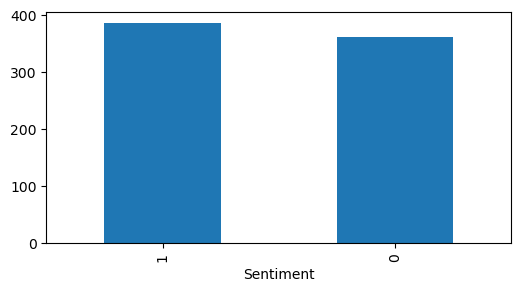

In [9]:
# 1 = positive sentiment, 0 = negative sentiment
print(imdb['Sentiment'].value_counts())

plt.figure(figsize=(6,3))
imdb['Sentiment'].value_counts().plot(kind='bar')
plt.show()

In [10]:
#B1a. Presence of unusual characters
    # Unusual characters are identified and removed
    
# Identify all characters contained in the reviews column
commentary = imdb['Reviews']
list_of_characters = []
for comment in commentary: 
    for character in comment:
        if character not in list_of_characters:
            list_of_characters.append(character)
print(list_of_characters)

['A', ' ', 'v', 'e', 'r', 'y', ',', 's', 'l', 'o', 'w', '-', 'm', 'i', 'n', 'g', 'a', 'b', 'u', 't', 'd', 'f', '.', 'N', 'h', 'c', 'k', 'p', '&', 'x', 'V', 'T', 'G', 'I', "'", 'W', 'S', 'L', 'J', 'B', 'F', 'M', 'H', 'C', '"', '\x96', '\t', '1', '\n', 'z', '?', 'q', 'Y', '0', 'j', 'P', 'U', 'R', 'E', '3', ';', '/', 'O', '2', '9', ':', '*', 'D', 'Q', 'é', '(', ')', '!', 'K', '$', '7', '5', 'Z', '\x85', '8', '+', '%', '4', 'å', '6', '\x97', 'X']


In [11]:
# Several unusual and/or non-helpful characters appear in the Reviews column. 
# The code below removes these characters + converts reviews to all lowercase, tokenizes & lemmatizes reviews, & removes stopwords
# (Elleh, n.d.)

# Create an empty list to store cleaned reviews
description_list = []

# Define the list of stopwords, specifying English as the language
stop_words = stopwords.words('english')

# Special/unusual characters will be removed by iterating over a for loop
for description in imdb['Reviews']: 
    
#Regular Expression can remove special characters from the string. 
#It will be in the form [^a-zA-Z0-9], where ^ represents any character except the characters in the brackets, 
##and a-zA-Z0-9 represents that string can only have small and capital alphabets and numerical digits. 
    description = re.sub("[^a-zA-Z]", " ", description) 
#Convert to lower case
    description = description.lower()
#Perform tokenization
    description=nltk.word_tokenize(description)
#Perform lemmatization
    lemma = nltk.WordNetLemmatizer()
    description = [lemma.lemmatize(word) for word in description]
#Removing stopwords
    description = [word for word in description if not word in stop_words]
    description = " ".join(description)
    description_list.append(description)

In [12]:
# The cleaned reviews are now stored in description_list
# Create a dataframe out of this list:
description_df = pd.DataFrame(description_list, columns=['CleanReviews'])

# Append Sentiments from the original dataframe to this new dataframe
description_df = pd.concat([description_df, imdb['Sentiment']], axis=1)

description_df.head()

,CleanReviews,Sentiment
0,slow moving aimless movie distressed drifting ...,0
1,sure wa lost flat character audience nearly ha...,0
2,attempting artiness black white clever camera ...,0
3,little music anything speak,0
4,best scene movie wa gerardo trying find song k...,1


In [13]:
# B1b. Vocabulary size
# This is the number of unique, or tokenized, words contained across all reviews

tokenizer = Tokenizer()
tokenizer.fit_on_texts(description_df['CleanReviews'])
print("Number of unique words:", len(tokenizer.word_index) + 1)

Number of unique words: 2719


In [16]:
# B1c. Proposed word embedding length
# (Elleh, n.d.)

# Calculate the minimum, maximum, and median review lengths 
review_length = []
for char_len in description_df['CleanReviews']:
    review_length.append(len(char_len.split(" ")))

review_max = np.max(review_length)
review_min = np.min(review_length)
review_median = np.median(review_length)

print("Max length of sequences is:", review_max)
print("Min length of sequences is:", review_min)
print("Median length of sequences is:", review_median)

# The median review length will be used as the proposed word embedded length here: 
print()
print("Proposed word embedding length:", review_median)

Max length of sequences is: 703
Min length of sequences is: 1
Median length of sequences is: 7.0

Proposed word embedding length: 7.0


In [18]:
# B1d. Statistical justification for the chosen maximum sequence length
    # The code executed in B1c computes the maximum review length, which is the maximum sequence length:
print("Maximum sequence length:", review_max)

Maximum sequence length: 703


**B2. Tokenization**
<br>Tokenization is a preprocessing step in which text strings are broken down into smaller components, called tokens. There are multiple types of tokenization including word, character, and subword tokenization. This process is done to accomplish multiple things: 
* A primary goal in performing tokenization is to represent text in such a way that it is meaningfully understood by a machine, while also retaining its context (Awan, 2023).
* Another goal of tokenization is to make text data easier to analyze. When data is broken down into smaller pieces it becomes more manageable and easier to understand. 
* Tokenization also helps with preprocessing by allowing for stopwords and unnecessary characters to be identified and removed

<br>Tokenization was used previously to compute the number of unique words in the IMDb dataset in section B1b. Below is the code again for reference:

In [19]:
# Word tokenization:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(description_df['CleanReviews'])
print("Number of unique words:", len(tokenizer.word_index) + 1)

Number of unique words: 2719


In [20]:
# Output a list of all word tokens
description_df['CleanReviews'].apply(word_tokenize)

0      [slow, moving, aimless, movie, distressed, dri...
1      [sure, wa, lost, flat, character, audience, ne...
2      [attempting, artiness, black, white, clever, c...
3                       [little, music, anything, speak]
4      [best, scene, movie, wa, gerardo, trying, find...
                             ...                        
743    [got, bored, watching, jessice, lange, take, c...
744    [unfortunately, virtue, film, production, work...
745                                 [word, embarrassing]
746                                 [exceptionally, bad]
747      [insult, one, intelligence, huge, waste, money]
Name: CleanReviews, Length: 748, dtype: object

In [21]:
# To demonstrate how tokenization helps to retain meaning:
# Compare number of unique words in the original Reviews column to the cleaned dataset
tokenizer.fit_on_texts(imdb['Reviews'])
word_count = len(tokenizer.word_index) + 1
print("Number of unique words:", word_count)

Number of unique words: 3342


In [22]:
# Output a list of all word tokens
imdb['Reviews'].apply(word_tokenize)

0      [A, very, ,, very, ,, very, slow-moving, ,, ai...
1      [Not, sure, who, was, more, lost, -, the, flat...
2      [Attempting, artiness, with, black, &, white, ...
3      [Very, little, music, or, anything, to, speak,...
4      [The, best, scene, in, the, movie, was, when, ...
                             ...                        
743    [I, just, got, bored, watching, Jessice, Lange...
744    [Unfortunately, ,, any, virtue, in, this, film...
745            [In, a, word, ,, it, is, embarrassing, .]
746                              [Exceptionally, bad, !]
747    [All, in, all, its, an, insult, to, one, 's, i...
Name: Reviews, Length: 748, dtype: object

In [23]:
# Note the difference in the two outputs-- the preprocessed df does not contain tokens such as 'a', 'an', 'this', etc.
    # These tokens do not add meaning to the reviews and are unneccessary to input for the model training portion

**B3. Padding process**
<br>String data, whether customer reviews or otherwise, is going to be variable in length. Padding addresses this issue by making each string a uniform length by either adding or removing characters in a string. 

In [24]:
# (DataCamp, Machine Translation with Keras, n.d.)

# Run description_list through the tokenizer
    # description_list, defined in B1a for preprocessing, is the list of preprocessed reviews 
    # inputting description_list in this way converts it to a list of integers using texts_to_sequences
seqs = tokenizer.texts_to_sequences(description_list)

# use pad_sequences to pad after the text sequence by specifying 'post' for both padding and truncating
preproc_text = pad_sequences(seqs, padding='post', truncating='post', maxlen=review_max)

preproc_text

array([[ 271,  398, 1216, ...,    0,    0,    0],
       [ 519,   13,  400, ...,    0,    0,    0],
       [1220, 1221,  190, ...,    0,    0,    0],
       ...,
       [ 258,  558,    0, ...,    0,    0,    0],
       [2731,   17,    0, ...,    0,    0,    0],
       [ 478,   15,  468, ...,    0,    0,    0]])

In [26]:
# Output a single padded sentence: 

to_words = tokenizer.sequences_to_texts(preproc_text)
to_words[2]

print(preproc_text[2])
print(description_list[2])
print(to_words[2])

[1220 1221  190  207  324  172  741    4  273  742   31  325   27   13
  274   45   98  193  326 1222    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

**B4. Categories of sentiment**
<br>The IMDb dataset contains sentiments with one of two values: 0 and 1, with 0 representing negative sentiment and 1 representing positive sentiment. Thus, two categories of sentiment will be used in this analysis. 

As the sigmoid activation function is used for binary classification problems, it will be used here. 

In [39]:
# (Elleh, n.d.)

activation = 'sigmoid'
loss = 'binary_crossentropy'
optimizer = 'adam' 
num_epochs = 20

# Define early stopping monitor 
early_stopping_monitor = EarlyStopping(patience=2)

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(word_count, review_max, input_length=review_max),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(2, activation=activation)
])

model.compile(loss=loss,optimizer=optimizer,metrics=['accuracy'])

# A model summary is printed in section C1

In [32]:
# The final preprocessing step is to split the data into train and test sets
# Splitting the data:

# In order for the model to be trained, X and y need some modifications to their shape
# X is the padded sequences:
padded_X = pad_sequences(seqs, padding='post', truncating='post', maxlen=review_max)
padded_X

# Define X and y to 
X = padded_X
y = description_df['Sentiment'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [33]:
# With y_test and y_train defined, y can be one-hot encoded.
    # Re-define y_test and y_train as such
# (StackOverflow, 2019)
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

**B5. Steps to prepare the data**
<br>The preceding code accomplishes the preprocessing steps necessary for this analysis. To recap, the following has been completed:
1. Packages were imported.
2. The dataset was imported.
3. Exploratory data analysis was performed.
4. The data was cleaned. 
5. Total vocabulary count was computed.
6. Proposed word embedding length was computed.
7. Maximum sequence length was computed.
8. The data was tokenized.
9. The data was padded.
10. Number of categories was determined.
11. The model was instantiated.
12. The data was split into train and test sets. 

An 80-20 split was used for creating the train and test sets, as this is the standard split for model-building. With the data split into train and test sets, their size can be inspected: 

In [36]:
# Inspect shape of train and test sets
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

X_train shape: (598, 703)
X_test shape: (150, 703)
y_train shape: (598, 2)
y_test shape: (150, 2)


**B6. Prepared data**
<br>The prepared data is downloadable via the code below.

In [37]:
# Train and test data:
X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)
y_train_df = pd.DataFrame(y_train)
y_test_df = pd.DataFrame(y_test)

pd.DataFrame(X_train_df).to_csv("C:/Users/psuik/Desktop/WGU/D213/x_train_D213_task2.csv")
pd.DataFrame(X_test_df).to_csv("C:/Users/psuik/Desktop/WGU/D213/x_test_D213_task2.csv")
pd.DataFrame(y_train_df).to_csv("C:/Users/psuik/Desktop/WGU/D213/y_train_D213_task2.csv")
pd.DataFrame(y_test_df).to_csv("C:/Users/psuik/Desktop/WGU/D213/y_test_D213_task2.csv")

# Cleaned dataframe in full:
pd.DataFrame(description_df).to_csv("C:/Users/psuik/Desktop/WGU/D213/cleaned_df_D213_task2.csv")

### Part III: Network Architecture

**C1. Model Summary**
<br>The output of the model summary of the function from TensorFlow is printed below.

In [40]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 703, 703)          2349426   
                                                                 
 global_average_pooling1d_2  (None, 703)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_6 (Dense)             (None, 100)               70400     
                                                                 
 dense_7 (Dense)             (None, 50)                5050      
                                                                 
 dense_8 (Dense)             (None, 2)                 102       
                                                                 
Total params: 2424978 (9.25 MB)
Trainable params: 2424978 (9.25 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [60]:
# With the model constructed, it can be trained on the training data
# (Elleh, n.d.)
history = model.fit(X_train, y_train, epochs=20, batch_size=50, validation_split=0.3, 
                    callbacks=[early_stopping_monitor], verbose=True)

Epoch 1/20
9/9 [==============================] - 1s 66ms/step - loss: 0.0561 - accuracy: 0.9833 - val_loss: 0.6960 - val_accuracy: 0.7333
Epoch 2/20
9/9 [==============================] - 0s 56ms/step - loss: 0.0470 - accuracy: 0.9904 - val_loss: 0.6911 - val_accuracy: 0.7389
Epoch 3/20
9/9 [==============================] - 0s 54ms/step - loss: 0.0611 - accuracy: 0.9809 - val_loss: 0.6371 - val_accuracy: 0.7667
Epoch 4/20
9/9 [==============================] - 0s 54ms/step - loss: 0.0417 - accuracy: 0.9833 - val_loss: 0.5802 - val_accuracy: 0.7500
Epoch 5/20
9/9 [==============================] - 0s 55ms/step - loss: 0.0379 - accuracy: 0.9928 - val_loss: 0.6080 - val_accuracy: 0.7333
Epoch 6/20
9/9 [==============================] - 1s 61ms/step - loss: 0.0446 - accuracy: 0.9928 - val_loss: 0.7253 - val_accuracy: 0.7333


**C2. Network architecture**
<br>The network is made up of 5 layers.

Layer 1: Embedding
parameters: 2,349,426

Layer 2: GlobalAverage
parameters: 0

Layer 3: Dense
parameters: 70,400 

Layer 4: Dense
parameters: 5,050

Layer 5: Dense
parameters: 102

The total number of parameters is 2,424,978. All of the parameters are trainable. 

**C3. Hyperparameters**
<br>C3a. Activation function: 
<br>The sigmoid activation function was chosen because this neural network is dealing with binary data.

<br>C3b. Number of nodes per layer: 
<br>The first dense layer contains 100 nodes, the second 50, and the third 2.

<br>C3c. Loss function: 
<br>Binary crossentropy was chosen for the fact that the sentiment values are binary (0 and 1).

<br>C3d. Optimizer: 
<br>The Adam optimizer is a commonly used optimization algorithm. Its benefits include its ease of implementation and computational efficiency (Elleh, n.d.).

<br>C3e. Stopping criteria: 
<br>Stopping criteria is used to prevent overfitting on the training data, which improves performance of the final model as it is fed unseen data. The model will stop running after its performance plateau from one epoch to the next. Stopping criteria is determined by the 'patience' parameter established in the model-building step. Here, patience is set to 2. This means that during training, the model will not run more than 2 times without seeing an improvement, thus stopping the training. 

<br>C3f. Evaluation metric: 
<br>Accuracy is the selected evaluation metric, calculated below:

In [71]:
# Model accuracy - test data: 
score = model.evaluate(X_test, y_test_one_hot, verbose=0)
print('Test accuracy:', {score[1]})

Test accuracy: {0.7200000286102295}


In [72]:
# For comparison, model accuracy of the train data:  
score = model.evaluate(X_train, y_train_one_hot, verbose=0)
print('Train accuracy:', {score[1]})

Train accuracy: {0.9080267548561096}


### Part IV: Model Evaluation

**D1. Stopping criteria**
<br>As discussed in C3e, stopping criteria helps to prevent overfitting. Stopping criteria for the neural network created here is set to 2, meaning the model will not run more than two successive times if it does not see improvement. The number of epochs is set to 20. This means that the model will run through a maximum of 20 iterations before stopping. If the stopping criteria of the model is met prior to these 20 epochs being run, however, the model will stop running prior to these 20 iterations. 

A screenshot of the final training epoch is included below: 

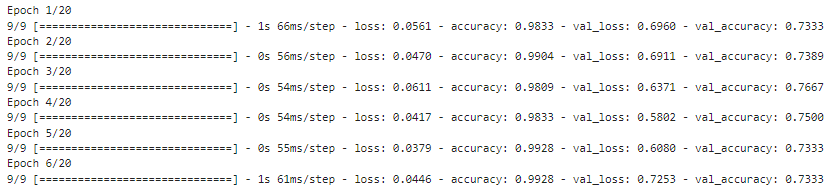

**D2. Fitness**
<br>The model's fitness is measured on the chosen evaluation criteria, which in this case is its accuracy. The model's accuracy scores are computed in section C3f, and come out to:
* Test accuracy: 0.720
* Train accuracy: 0.908

As discussed in prior sections, overfitting is mitigating through use of stopping criteria, which is determined here by a patience of 2.

**D3. Training process**
<br>The model's training process is demonstrated in section C1. Line graphs of the model's loss and accuracy are below:

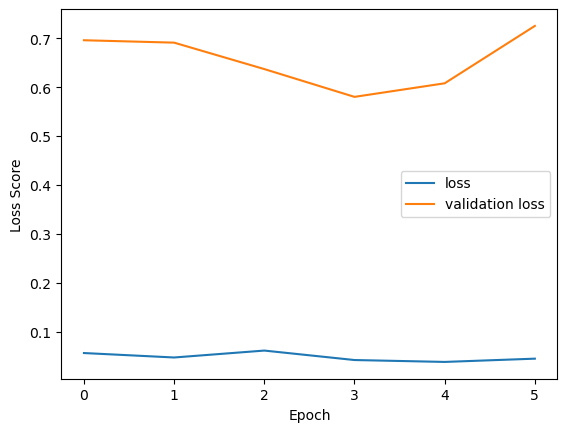

In [80]:
# Loss:
# (WGU, n.d.)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Score')
plt.legend()
plt.show()

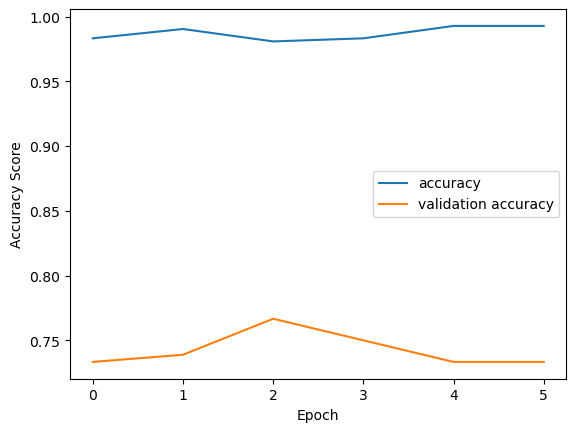

In [81]:
# Accuracy:
# (WGU, n.d.)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

**D4. Predictive accuracy**
<br>The predictive accuracy of the model, based on its accuracy score, is the calculated test accuracy, which comes out to: **Test accuracy: 0.720**.

With an accuracy score of 0.720, or 72%, this indicates that the model will correctly predict a viewer's sentiment on 72% of the text inputs it is given.

### Part V: Summary and Recommendations

**E. Code**
<br>The code below saves the trained network within the neural network.

In [82]:
model.save('SentimentAnalysisModel.h5')

**F. Functionality**
<br>The dataset used in this analysis is made up of 748 rows, or 748 movie viewers' reviews of films. The model created here was trained on 80%, or 598, of the rows, and tested on 20%, or 150 of the rows. Functionally, the model cosntructed here was able to accurately predict sentiment for 91% of reviews in the train dataset; and as mentioned in D4, the model accurately predicted sentiment for 72% of reviews in the test dataset. 

The architecture of this neural network model, determined by the chosen parameters, most certainly impacted these scores. 

**G. Recommendations**
<br>Before a recommendation is made, the question posed in section A1, **"Can a future movie reviews be predicted to have a positive or negative sentiment based on past reviews from other moviegoers?**, will be answered: 
Based on the accuracy score of the test dataset, **yes**, it is possible to **build a model that will accurately predict how a viewer feels about a film based on the words they use in their review**. With this, the objective set in section A2 is met satisfactorily. 

These answers are based on the test set accuracy of 0.720, which indicates that the model performs sufficiently in predicting positive or negative reviewer sentiment about a film. With a sufficient understanding of moviegoer sentiment, those in the filmmaking industry can base their understanding of trends in viewer sentiment, which can aid in future decision-making.

While this 72% accuracy is deemed sufficient, there is certainly room to improve the model. This can be accomplished by collecting more movie viewers' opinions in order to be able to feed this new data into the model created here in order to improve its accuracy.

To summarize the recommendations of this report: 
* The neural network created here is sufficient in determining positive or negative movie viewer sentiment.
* The neural network can be improved by increasing the size of the training dataset. 

### Part VI: Reporting

**H. Reporting**
<br>This report is submitted in two formats-- the Jupyter Notebook in a .ipynb file + an HTML version.

**I. Sources for third-party code**

Elleh, F. D213 Task 2 Cohort Webinar [PowerPoint Slides].

Machine Translation with Keras | Part 2: Preprocessing the text [DataCamp Slides]. https://campus.datacamp.com/pdf/web/viewer.html?file=https://projector-video-pdf-converter.datacamp.com/17605/chapter3.pdf#page=12 

(2019, March 1). Tensorflow estimator ValueError: Logits and labels must have the same shape ((?, 1) vs (?,)). StackOverflow. Retrieved February 13, 2024, from https://stackoverflow.com/questions/48851558/tensorflow-estimator-valueerror-logits-and-labels-must-have-the-same-shape 

D213 Sentiment Analysis Presentation _ 3_default_da1cc82b [Webinar]. WGU. https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=fe172002-6cbb-40c0-92a3-b07d01025504 

**J. Sources**

Awan, A. A. (2023, September 1). What is Tokenization? DataCamp. Retrieved February 12, 2024, from https://www.datacamp.com/blog/what-is-tokenization 

Amazon Web Services (AWS) (n.d.). What is RNN. AWS. https://aws.amazon.com/what-is/recurrent-neural-network/#:~:text=A%20recurrent%20neural%20network%20 

Bansal, S. (2022, June 15). Ultimate Guide to Understand and Implement Natural Language Processing (with codes in Python). Analytics Vidhya. Retrieved February 12, 2024, from https://www.analyticsvidhya.com/blog/2017/01/ultimate-guide-to-understand-implement-natural-language-processing-codes-in-python/ 

Elleh, F. D213 Task 2 Cohort Webinar [PowerPoint Slides]. 

Introduction to TensorFlow in Python | Activation functions [DataCamp Slides]. DataCamp. https://campus.datacamp.com/pdf/web/viewer.html?file=https://projector-video-pdf-converter.datacamp.com/15108/chapter3.pdf#page=20